# Classification for a particular item is bought or not based on income and age

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
db=pd.read_csv("C:\\Users\\kashi\\OneDrive\\Desktop\\Siddhant\\Machine Learning A-Z\\Part 10 - Model Selection and Boosting\\Section 48 - Model Selection\\Python\\Social_Network_Ads.csv")
x=db.iloc[:,:-1].values
print(x)
y=db.iloc[:,-1].values
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Naive Bayes Classifier

In [4]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [5]:
ypred=classifier.predict(x_test)

[[55  3]
 [ 4 18]]


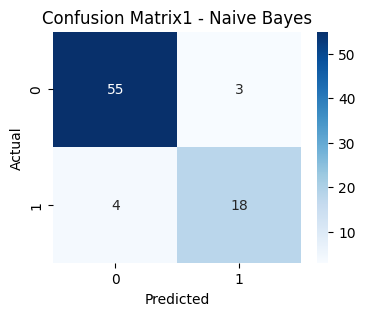

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
cm=confusion_matrix(y_test,ypred)
print(cm)
accuracy_score(y_test,ypred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix1 - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



In [8]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)

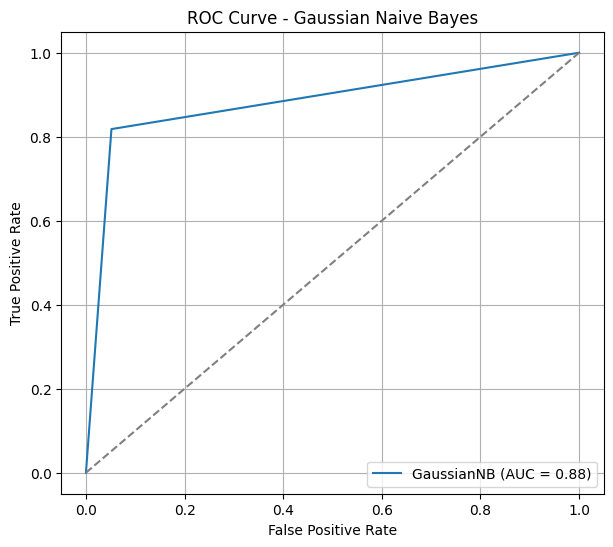

In [9]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"GaussianNB (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gaussian Naive Bayes")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-12, -6, 6)
train_scores, test_scores = validation_curve(
    GaussianNB(),
    x_train, y_train,
    param_name="var_smoothing",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


In [11]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)


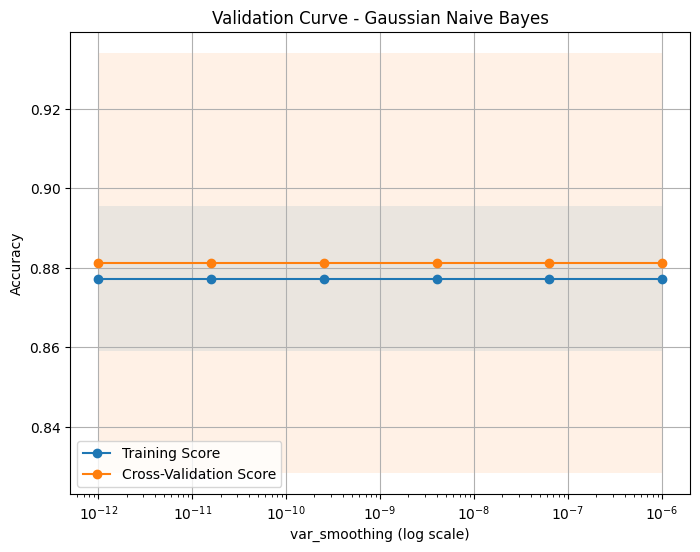

In [12]:
plt.figure(figsize=(8, 6))
plt.semilogx(param_range, train_mean, label="Training Score", marker='o')
plt.semilogx(param_range, test_mean, label="Cross-Validation Score", marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title("Validation Curve - Gaussian Naive Bayes")
plt.xlabel("var_smoothing (log scale)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## SVM

In [13]:
from sklearn.svm import SVC
classifier1=SVC(kernel='rbf',random_state=0)
classifier1.fit(x_train,y_train)

SVC(random_state=0)

In [14]:
ypred_svm=classifier1.predict(x_test)

[[55  3]
 [ 1 21]]


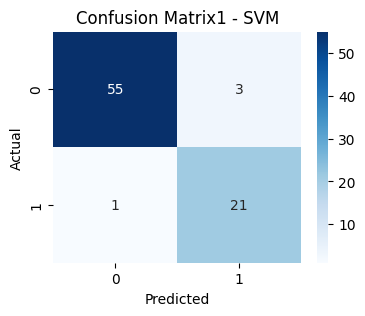

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
cm=confusion_matrix(y_test,ypred_svm)
print(cm)
accuracy_score(y_test,ypred_svm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix1 - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_svm))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [17]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, ypred_svm)
roc_auc = auc(fpr, tpr)

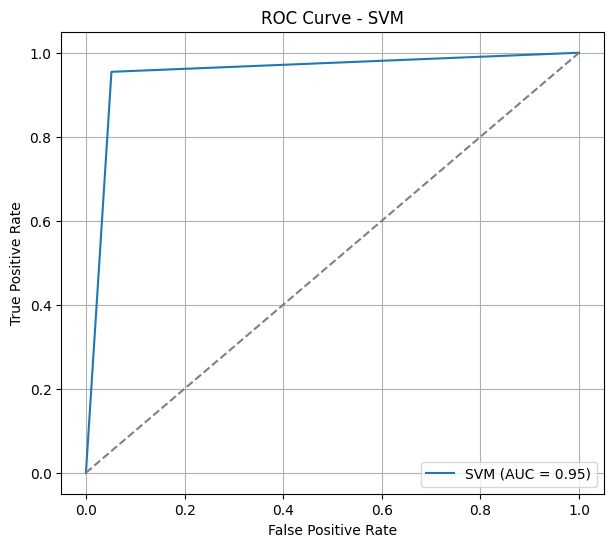

In [18]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [19]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-12, -6, 6)
train_scores1, test_scores1 = validation_curve(
    SVC(),
    x_train, y_train,
    param_name="C",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


In [20]:
train_mean1 = np.mean(train_scores1, axis=1)
test_mean1 = np.mean(test_scores1, axis=1)
train_std1 = np.std(train_scores1, axis=1)
test_std1 = np.std(test_scores1, axis=1)


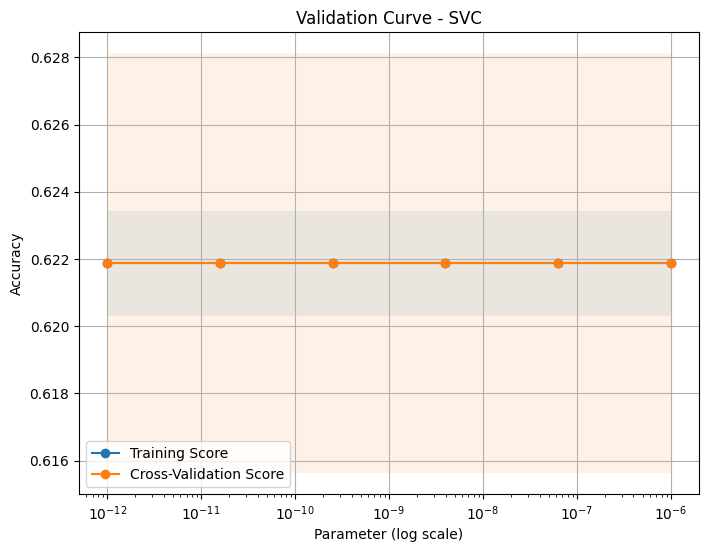

In [21]:
plt.figure(figsize=(8, 6))
plt.semilogx(param_range, train_mean1, label="Training Score", marker='o')
plt.semilogx(param_range, test_mean1, label="Cross-Validation Score", marker='o')

# Add shaded standard deviation regions
plt.fill_between(param_range, train_mean1 - train_std1, train_mean1 + train_std1, alpha=0.1)
plt.fill_between(param_range, test_mean1 - test_std1, test_mean1 + test_std1, alpha=0.1)

plt.title("Validation Curve - SVC")
plt.xlabel("Parameter (log scale)")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier3=RandomForestClassifier(n_estimators=4,criterion='entropy', random_state=0)
classifier3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=0)

In [23]:
ypred_rf=classifier3.predict(x_test)

[[55  3]
 [ 5 17]]
0.9


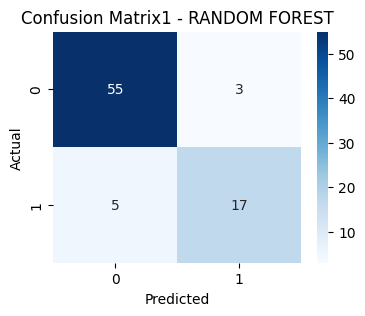

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
cm=confusion_matrix(y_test,ypred_rf)
print(cm)
accuracy_score(y_test,ypred_rf)
print(accuracy_score(y_test,ypred_rf))
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix1 - RANDOM FOREST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Cross-validation accuracies: [0.875  0.9    0.825  0.875  0.8625]
Mean CV Accuracy: 0.8675 ± 0.0245


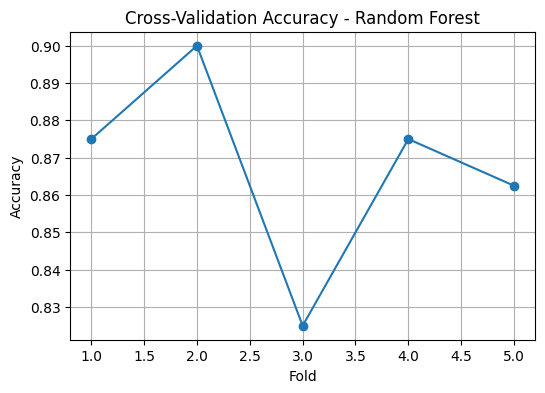

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier3, x, y, cv=cv, scoring='accuracy')

# Print scores
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

# Plot cross-validation accuracy scores
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.title("Cross-Validation Accuracy - Random Forest")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


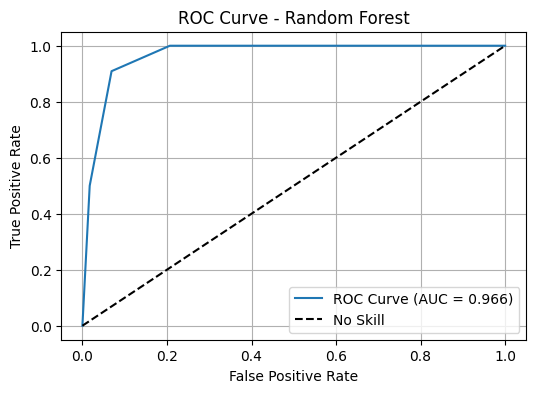

In [26]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = classifier3.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_rf))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.85      0.77      0.81        22

    accuracy                           0.90        80
   macro avg       0.88      0.86      0.87        80
weighted avg       0.90      0.90      0.90        80



# with nueral networks

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
classifier4 = Sequential()
classifier4.add(Dense(units=6,activation='relu',input_dim=2))
classifier4.add(Dense(units=6,activation='relu'))
classifier4.add(Dense(units=1,activation='sigmoid'))
classifier4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

c:\Users\kashi\Python\venv1\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
classifier4.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7236 - loss: 0.6692
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8426 - loss: 0.6352
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.6071
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8654 - loss: 0.5849
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8769 - loss: 0.5449
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.5184
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.4884
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8764 - loss: 0.4831
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9111 - loss: 0.4268
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9149 - loss: 0.4000


In [30]:
ypred_nn=classifier4.predict(x_test)
ypred_nn=(ypred_nn>0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,ypred_nn)
print(cm)
accuracy_score(y_test,ypred_nn)

[[53  5]
 [ 2 20]]


0.9125

[[53  5]
 [ 2 20]]


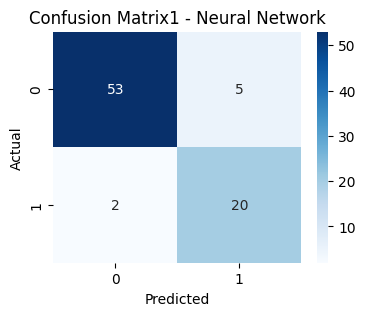

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
cm=confusion_matrix(y_test,ypred_nn)
print(cm)
accuracy_score(y_test,ypred_nn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix1 - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, test_idx in kfold.split(x):
    X_train, X_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Rebuild and train your model each fold
    classifier4.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    
    # Evaluate accuracy
    _, acc = classifier4.evaluate(X_test, y_test, verbose=0)
    acc_scores.append(acc)

print("Cross-validation accuracies:", acc_scores)
print("Mean accuracy:", np.mean(acc_scores))


Cross-validation accuracies: [0.3499999940395355, 0.6000000238418579, 0.612500011920929, 0.3375000059604645, 0.3125]
Mean accuracy: 0.4425000071525574


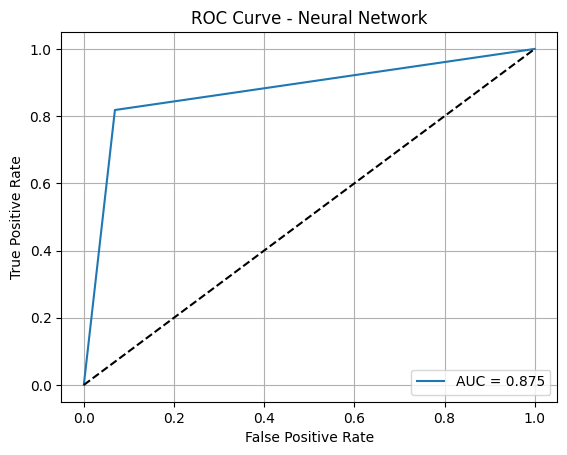

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, ypred_nn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Neural Network")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_nn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        58
           1       0.82      0.82      0.82        22

    accuracy                           0.90        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.90      0.90      0.90        80

